# HR Analytics Project- Understanding the Attrition in HR

In [92]:
# Importing Libraries and filtering warnings
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Reading Dataset
df=pd.read_csv('ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# First 5 Columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Last 5 Columns
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
# (Rows, Columns in df)
df.shape

(1470, 35)

In [7]:
# Memory size of df
df.size

51450

In [8]:
# Base information of df
# -- no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# Statistical description of numerical columns in df
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Data types of columns in df
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
# min of age
df.Age.min()

18

In [20]:
# Since min value in age is 18, over 18 column is useless
df.drop('Over18',axis=1,inplace=True)

In [13]:
# Unique values in attrition column
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [15]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [16]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [21]:
# Dropping Employee Count because all rows contain same value of 1
df.EmployeeCount.unique()

array([1])

In [22]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [23]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [25]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [26]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [32]:
# <<<<<<<<<< Need to use encoder to encode non-numerical features to numerical features >>>>>>>>>>>>>
lab_enc=LabelEncoder()

# Attrition Encoding
data=lab_enc.fit_transform(df['Attrition'])
df['Attrition']=data

# BusinessTravel Encoding
data=lab_enc.fit_transform(df['BusinessTravel'])
df['BusinessTravel']=data

# Department Encoding
data=lab_enc.fit_transform(df['Department'])
df['Department']=data

# EducationField Encoding
data=lab_enc.fit_transform(df['EducationField'])
df['EducationField']=data

# Gender Encoding
data=lab_enc.fit_transform(df['Gender'])
df['Gender']=data

# JobRole Encoding
data=lab_enc.fit_transform(df['JobRole'])
df['JobRole']=data

# MaritalStatus Encoding
data=lab_enc.fit_transform(df['MaritalStatus'])
df['MaritalStatus']=data

# OverTime Encoding
data=lab_enc.fit_transform(df['OverTime'])
df['OverTime']=data


df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,4,80,1,6,3,3,2,2,2,2


In [33]:
# Data types of features after encoding
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

In [34]:
# Label distribution
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Age'>

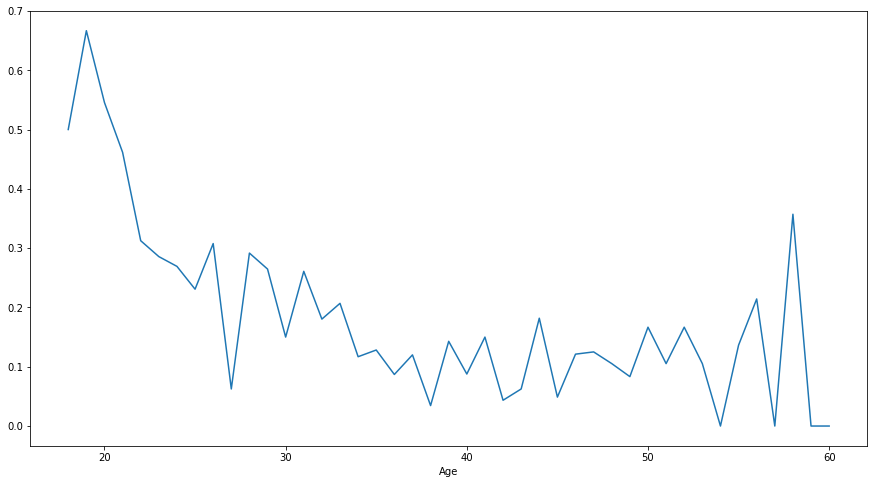

In [37]:
# Distribution of Age vs Attrition
D=df.groupby('Age').mean()
plt.figure(figsize=(15,8))
D['Attrition'].plot()

- Attrition is high for lower(younger) age.

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

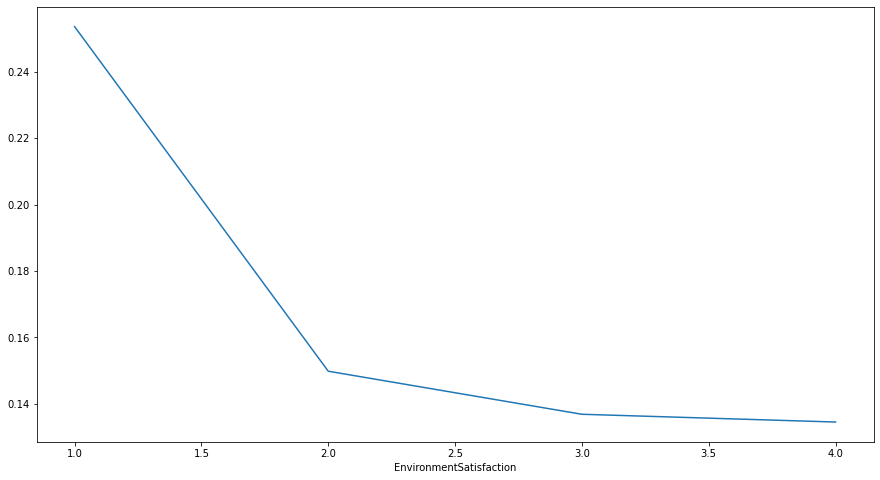

In [46]:
# Distribution of Environment Satisfaction vs Attrition
D=df.groupby('EnvironmentSatisfaction').mean()
plt.figure(figsize=(15,8))
D['Attrition'].plot()

 - Attrition is high for favourable environments

<AxesSubplot:xlabel='DistanceFromHome'>

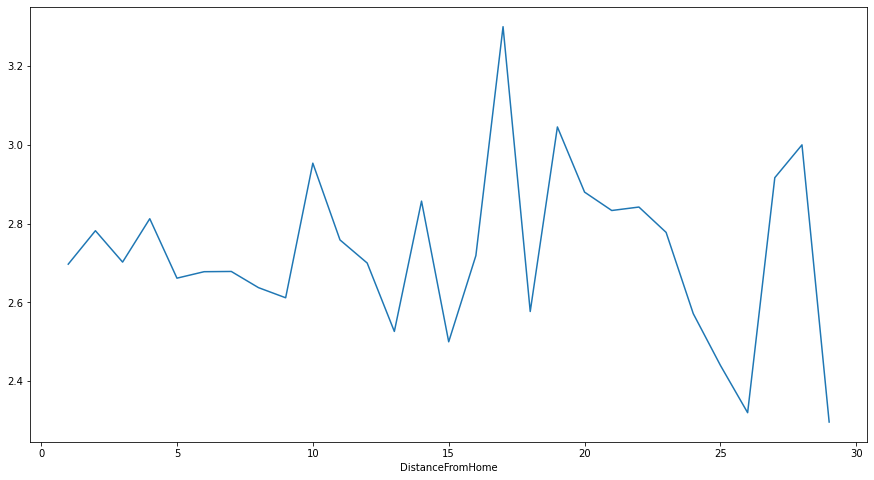

In [50]:
# Distribution of Dist from home vs Environment satisfaction
D=df.groupby('DistanceFromHome').mean()
plt.figure(figsize=(15,8))
D['EnvironmentSatisfaction'].plot()

<AxesSubplot:xlabel='Attrition'>

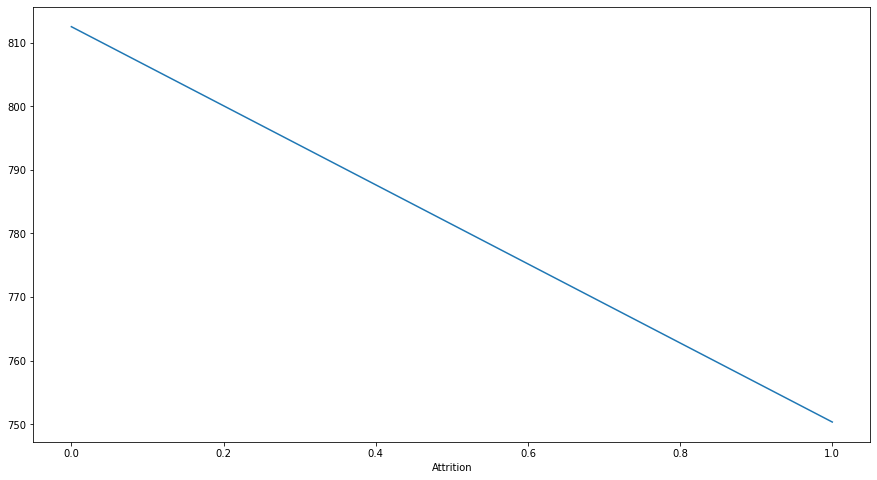

In [49]:
# Attrition vs Daily rate
D=df.groupby('Attrition').mean()
plt.figure(figsize=(15,8))
D['DailyRate'].plot()

 - Attrition inversely propotional to Daily Rate.

<AxesSubplot:>

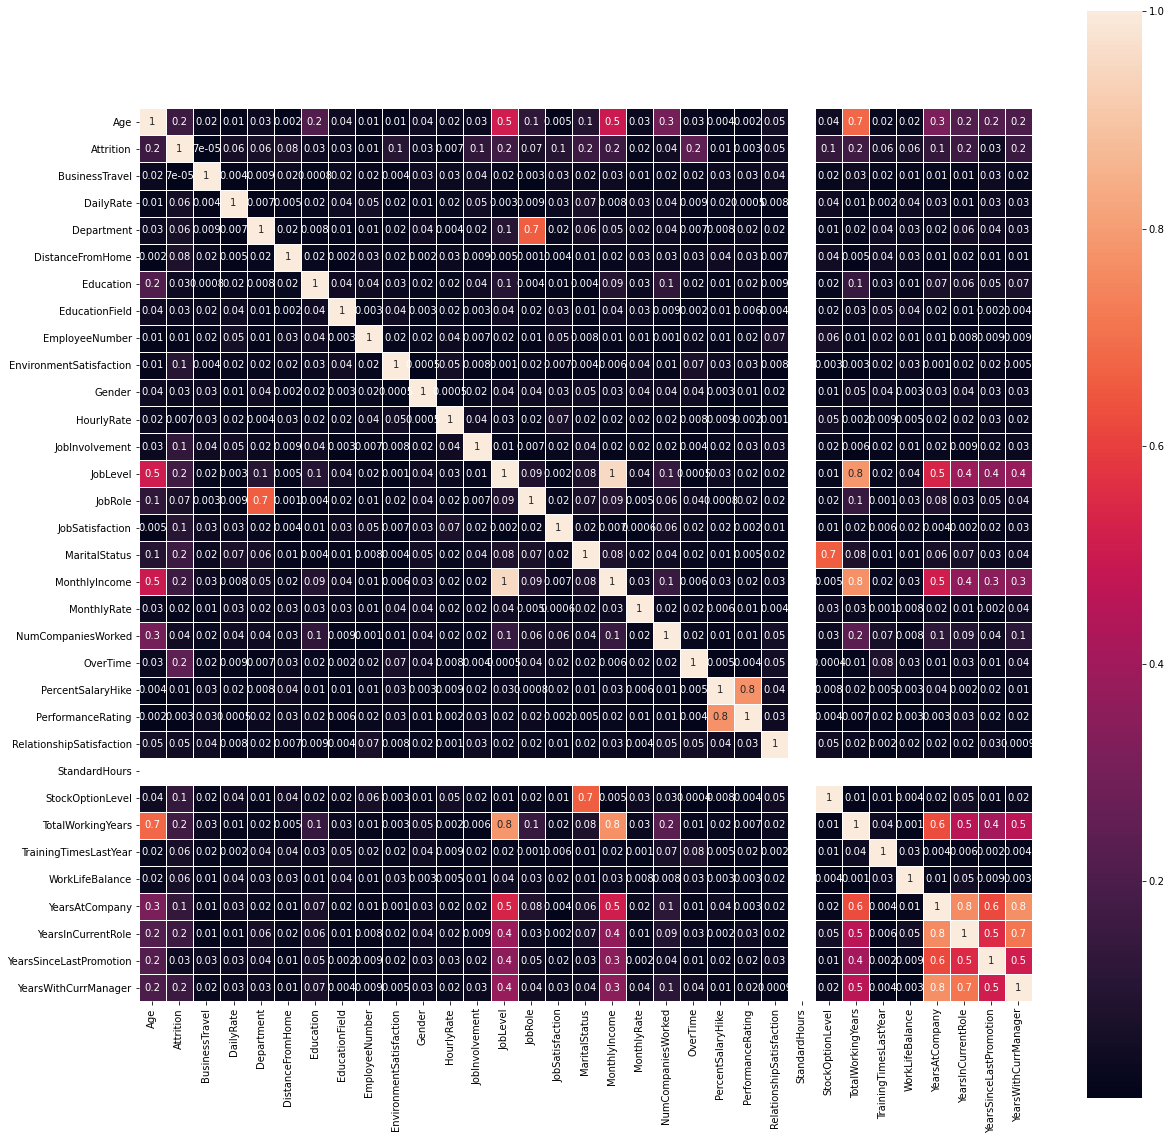

In [52]:
# correlatiion plot
df_corr=df.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

 - Max correlation between joblevel and monthly income.
 - Multi collinearity not present in labels so column drops are not required.

<AxesSubplot:xlabel='JobLevel'>

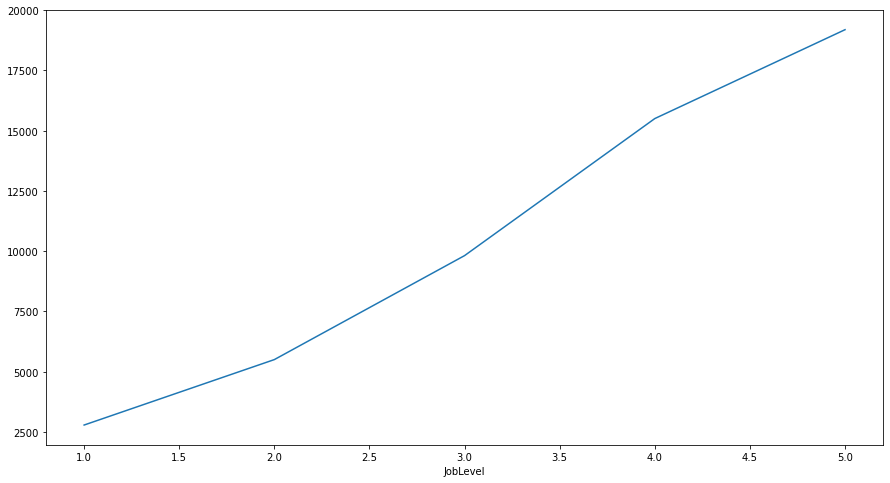

In [53]:
D=df.groupby('JobLevel').mean()
plt.figure(figsize=(15,8))
D['MonthlyIncome'].plot()

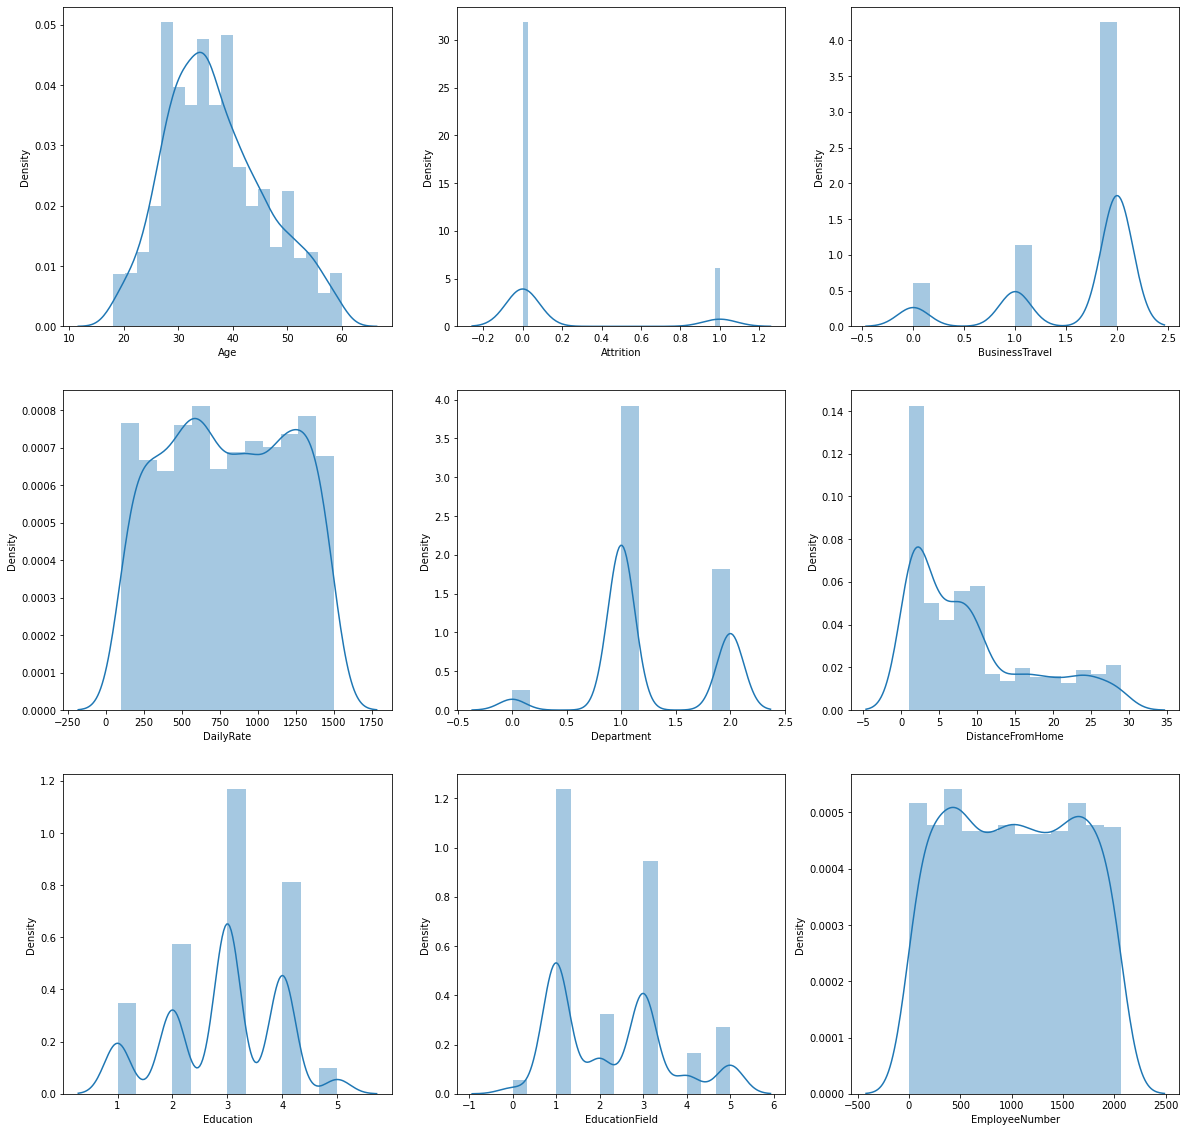

In [55]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

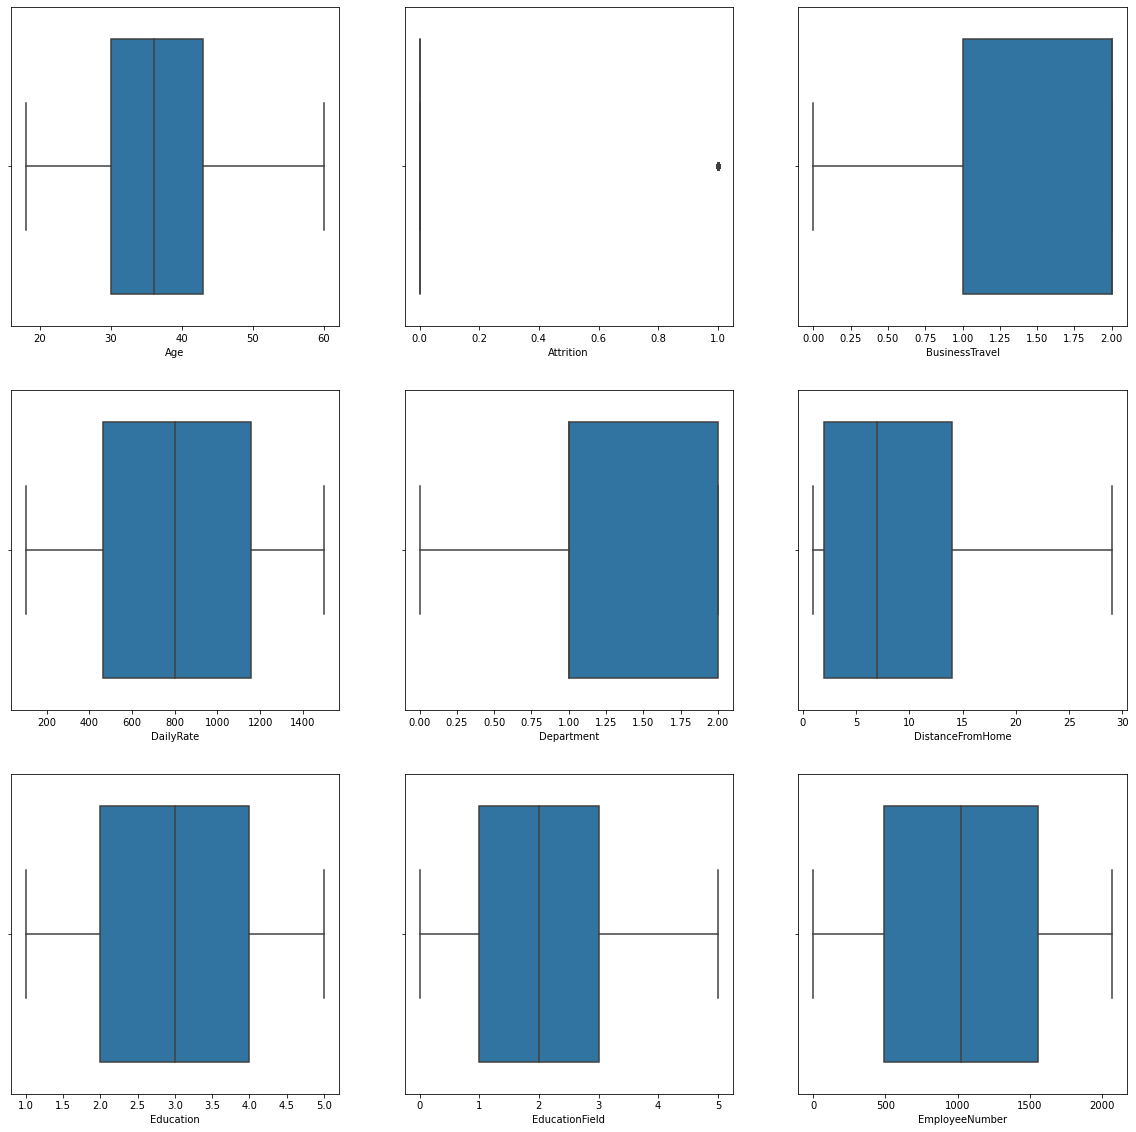

In [56]:
# Detecting Outliers
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [57]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]),
 array([32, 31, 29, 31, 30, 31, 26, 26, 29, 31, 30, 31, 32, 26, 29, 31, 32,
        31, 26, 32, 29, 30, 31, 30, 32, 29, 31, 26, 29, 30, 31, 31, 32, 26,
        29, 29, 31, 31, 26, 30, 29, 29, 31, 29, 32, 31, 29, 26, 29, 31, 32,
        26, 32, 29, 31, 29, 32

In [58]:
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [59]:
df.shape

(1387, 33)

- 1470-1387 = 83 columns dropped

In [61]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
T

In [62]:
x=df.drop(columns=['Attrition'],axis=1)
y=df['Attrition']

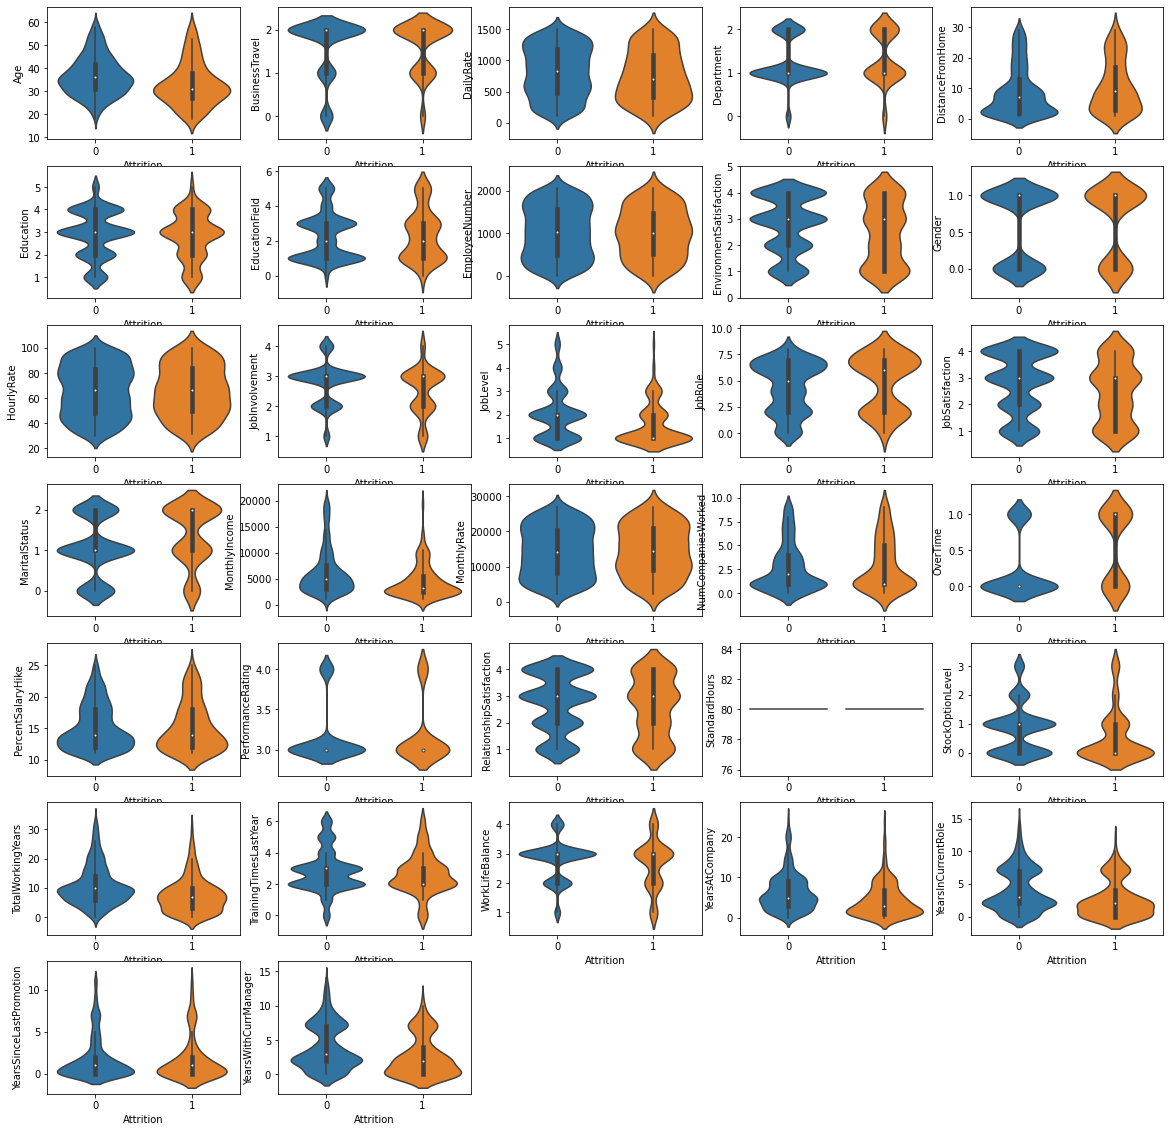

In [85]:
# Relation between features and labels using violin plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.violinplot(y,x[column])
    plotnumber+=1

In [86]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [87]:
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EmployeeNumber             -0.287518
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191407
StandardHours               0.000000
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
W

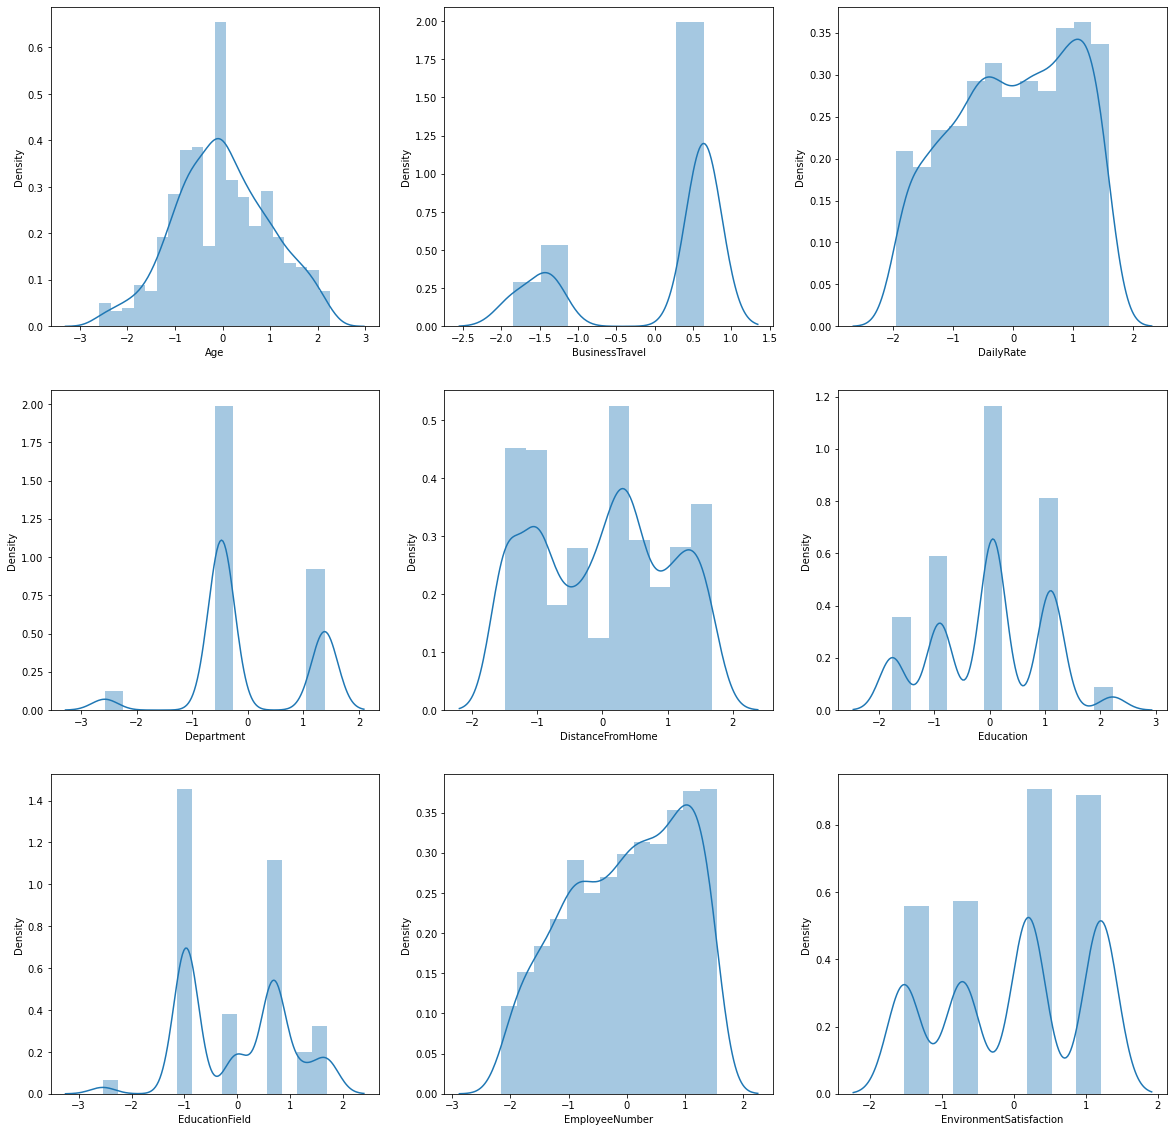

In [88]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [89]:
x = data_new
scaler=StandardScaler()
x=scaler.fit_transform(x)

### Model

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [94]:
#Classifiers :
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC(probability=True)

m_list = [knn,dt,rf,svm]

In [96]:
# Fitting Models
for m in m_list:
    m.fit(x_train,y_train)
#     Training------->>>>>
    print(m)
    train_preds = m.predict(x_train)
    print('Accuracy Score of KNN :',accuracy_score(y_train,train_preds)*100)
    
#     Testing------->>>>>>
    print(m)
    test_preds = m.predict(x_test)
    te_acc = accuracy_score(y_test,test_preds)*100
    print('Accuracy Score of KNN :',accuracy_score(y_test,test_preds)*100)
    
    
#     CV-------->>>>>
    print('cross validation scores below:--  \n',m)
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of KNN: ',scr.mean()*100)
    print('Difference between CV_score and acc of KNN: ',(te_acc-scr.mean()*100))
    print('\n')
    print('\n')

KNeighborsClassifier()
Accuracy Score of KNN : 87.01923076923077
KNeighborsClassifier()
Accuracy Score of KNN : 83.28530259365994
cross validation scores below:--  
 KNeighborsClassifier()
Cross validation score of KNN:  84.71521699607824
Difference between CV_score and acc of KNN:  -1.429914402418305




DecisionTreeClassifier()
Accuracy Score of KNN : 100.0
DecisionTreeClassifier()
Accuracy Score of KNN : 77.23342939481267
cross validation scores below:--  
 DecisionTreeClassifier()
Cross validation score of KNN:  77.57629275640859
Difference between CV_score and acc of KNN:  -0.3428633615959171




RandomForestClassifier()
Accuracy Score of KNN : 100.0
RandomForestClassifier()
Accuracy Score of KNN : 83.5734870317003
cross validation scores below:--  
 RandomForestClassifier()
Cross validation score of KNN:  85.36373789055398
Difference between CV_score and acc of KNN:  -1.7902508588536818




SVC(probability=True)
Accuracy Score of KNN : 92.21153846153847
SVC(probability=True)
Accu

#### <b>ROC Curves

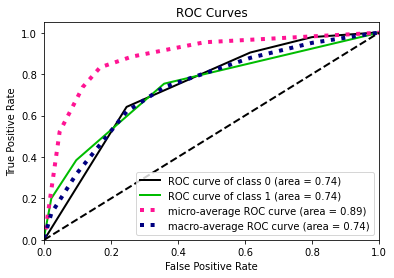

In [97]:
probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

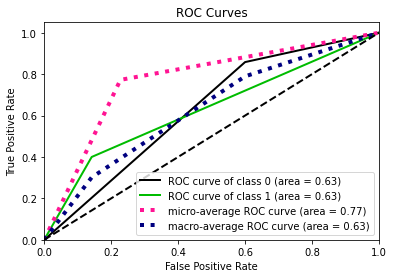

In [98]:
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

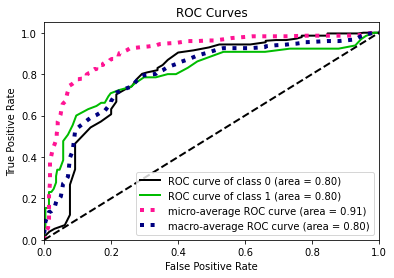

In [99]:
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

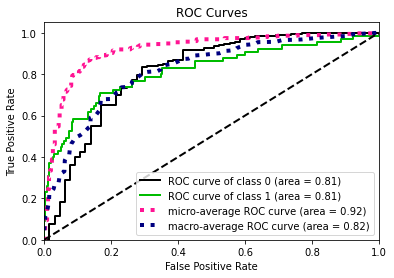

In [100]:
probas=svm.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

In [101]:
#Testing results from DTC
y_pred=dt.predict(x_test)
dtc_te_report=accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',accuracy_score(y_test,y_pred)*100)

Accuracy Score: 77.23342939481267


In [102]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.861210,0.393939,0.772334,0.627575,0.773681
recall,0.858156,0.400000,0.772334,0.629078,0.772334
f1-score,0.859680,0.396947,0.772334,0.628313,0.773001
support,282.000000,65.000000,0.772334,347.000000,347.000000


In [103]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,242,40
1,39,26


- <b>Difference is least for decision tree

### Hyper-parameter Tuning (HPT)

In [104]:
# Parameter Grid
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(12,24,3),
            'min_samples_leaf':range(22,40,2),
            'min_samples_split':range(10,50,2)}

In [105]:
grid_search=GridSearchCV(dt,param_grid=grid_param,cv=5,n_jobs=-1,verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(12, 24, 3),
                         'min_samples_leaf': range(22, 40, 2),
                         'min_samples_split': range(10, 50, 2)},
             verbose=2)

In [106]:
# Best Parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 24,
 'min_samples_split': 18}

In [109]:
# Model Fitted with best Parameters
dt=DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=24, min_samples_split=18)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [110]:
accuracy_score(y_test,y_pred)*100

83.5734870317003

Improved from 77.23342939481267 to 83.5734870317003
<br> <b> Accuracy increase of 6.340057636887622

In [112]:
# Classification report of Best model
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.866450,0.600000,0.835735,0.733225,0.816538
recall,0.943262,0.369231,0.835735,0.656247,0.835735
f1-score,0.903226,0.457143,0.835735,0.680184,0.819666
support,282.000000,65.000000,0.835735,347.000000,347.000000


### Model Saving 

In [115]:
import joblib

joblib.dump(dt,'DT_best.obj')

['DT_best.obj']

In [116]:
joblib.load('DT_best.obj')

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=24,
                       min_samples_split=18)